In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

In [31]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
print 'Number of classes: %d' %len(np.unique(iris_y))
print 'Number of data points: %d' %len(iris_y)


X0 = iris_X[iris_y == 0,:]
X00 = iris_X[iris_y == 0,:2]
print '\nSamples from class 0:\n', X0[:5,:]

X1 = iris_X[iris_y == 1,:]
X11 = iris_X[iris_y == 1,:2]
print '\nSamples from class 1:\n', X1[:5,:]

X2 = iris_X[iris_y == 2,:]
X22 = iris_X[iris_y == 2,:2]
print '\nSamples from class 2:\n', X2[:5,:]


X = np.concatenate((X00, X11, X22), axis = 0)

N = len(iris_y)/3


original_label = np.asarray([0]*N + [1]*N + [2]*N).T
print original_label.shape


Number of classes: 3
Number of data points: 150

Samples from class 0:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]

Samples from class 1:
[[ 7.   3.2  4.7  1.4]
 [ 6.4  3.2  4.5  1.5]
 [ 6.9  3.1  4.9  1.5]
 [ 5.5  2.3  4.   1.3]
 [ 6.5  2.8  4.6  1.5]]

Samples from class 2:
[[ 6.3  3.3  6.   2.5]
 [ 5.8  2.7  5.1  1.9]
 [ 7.1  3.   5.9  2.1]
 [ 6.3  2.9  5.6  1.8]
 [ 6.5  3.   5.8  2.2]]
(150,)


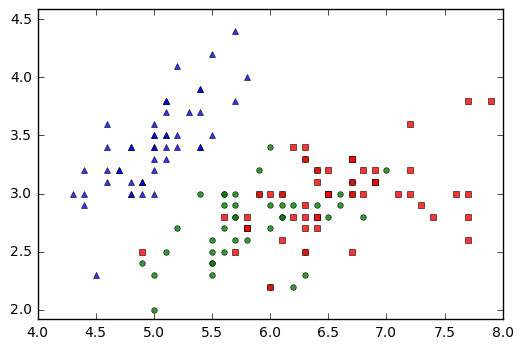

In [33]:
def kNN_display(X, label):
    K = np.amax(label) + 1
    X00 = X[label == 0, :]
    X11 = X[label == 1, :]
    X22 = X[label == 2, :]
    
    plt.plot(X00[:, 0], X00[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X11[:, 0], X11[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X22[:, 0], X22[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kNN_display(X, original_label)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     iris_X, iris_y, test_size=50)

print "Training size: %d" %len(y_train)
print "Test size    : %d" %len(y_test)

Training size: 100
Test size    : 50


In [4]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print "Print results for 20 test data points:"
print "Predicted labels: ", y_pred[20:40]
print "Ground truth    : ", y_test[20:40]

Print results for 20 test data points:
Predicted labels:  [2 2 2 0 0 2 1 0 0 0 1 0 2 0 1 1 0 0 0 0]
Ground truth    :  [2 2 2 0 0 2 1 0 0 0 1 0 2 0 1 1 0 0 0 0]


In [7]:
from sklearn.metrics import accuracy_score
clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [8]:
print "Accuracy of 10NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred))

Accuracy of 10NN with major voting: 98.00 %
